# Introduction

# Exploring The Data or "The Dead Don't Die"

In [687]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math

In [688]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

In [689]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [690]:
df.shape

(299, 13)

In [691]:
df['DEATH_EVENT'].sum() / df.shape[0]

0.3210702341137124

In [692]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [693]:
binary_vars = "anaemia diabetes high_blood_pressure smoking".split()
multival_vars = [var for var in list(df.columns) if var not in binary_vars + ["sex", "DEATH_EVENT"]]
print("Binary variables:", binary_vars)
print("Multi-value variables:", multival_vars)

Binary variables: ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
Multi-value variables: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


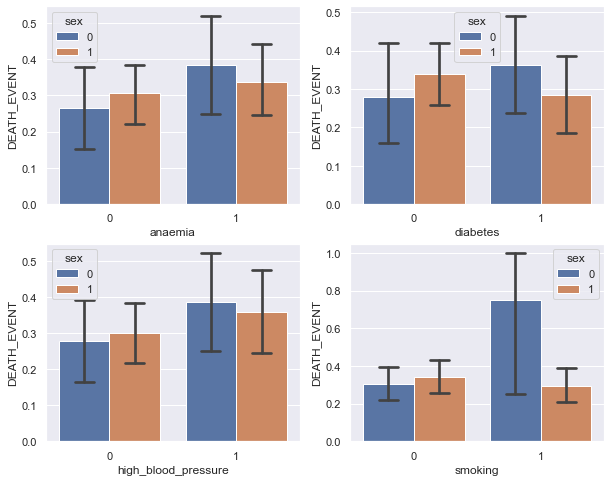

In [694]:
fig, ax = plt.subplots(2, 2, squeeze=False, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        sns.barplot(x=binary_vars[2*i+j], y='DEATH_EVENT', hue='sex', data=df, ax=ax[i, j], capsize=.15)

Perhaps surprisingly, the categorical features: anaemia, diabetes, hypertension and smoking, do not exhibit statistically significant impact on the patient survival prospects. Neither does the sex.
Curiously, the big uncertainty for the smoking women (`sex = 0`) must be reflective of very few patients in this category.

In [695]:
df.query('sex == 0 & smoking == 1')['DEATH_EVENT']

41     1
54     1
76     0
105    1
Name: DEATH_EVENT, dtype: int64

Indeed there were only 4 such women and 3 have passed away, yielding 75% value of the bar height and big uncertainty.

In [696]:
# def a_over_b_err(a, b):
#     def err(x):
#         return np.sqrt(x)
#     return a/b * np.sqrt((err(a)/a)**2 + (err(b)/b)**2 -2*err(a)*err(b)/a/b)
# a_over_b_err(3, 4)

In [697]:
df[df["DEATH_EVENT"] == 0]['age'].mean()

58.761906403940884

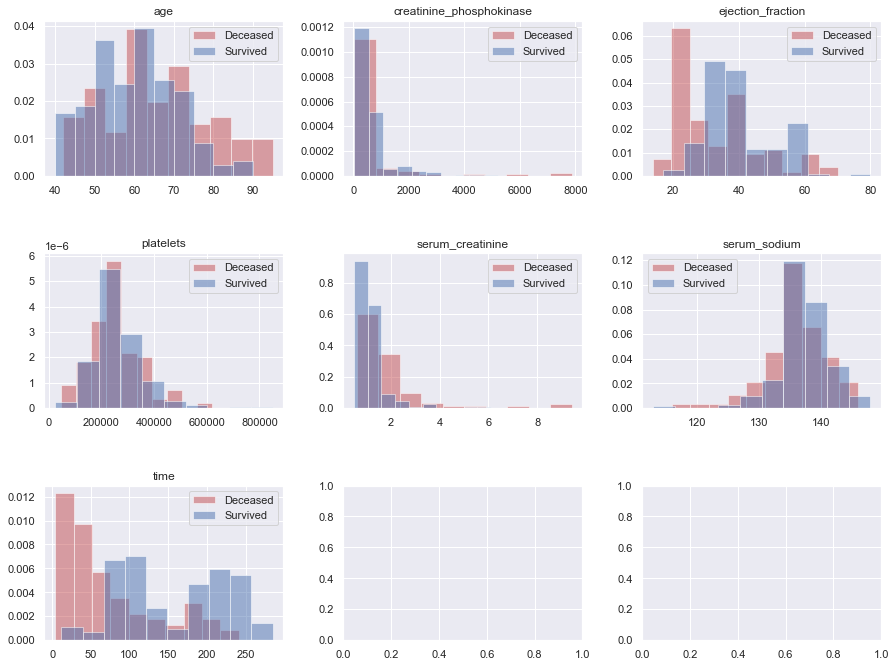

In [698]:
def print_fig(data, cols, ncols=3, figsize=(15,8)):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, 
                           squeeze=False, figsize=figsize)
    for i in range(nrows):
        for j in range(ncols):
            if i * nrows + j > len(cols) - 1:
                break
            cat1 = data[data["DEATH_EVENT"] == 1]
            cat2 = data[data["DEATH_EVENT"] == 0]
            cat1[cols[i*nrows+j]].hist(alpha=0.5, ax=ax[i, j], color='r', density=True, label='Deceased')
            cat2[cols[i*nrows+j]].hist(alpha=0.5, ax=ax[i, j], color='b', density=True, label='Survived')
            ax[i, j].set_title(cols[i*nrows+j])
            ax[i, j].legend(loc='best')
            plt.subplots_adjust(hspace=0.5, wspace=0.25, top=1.2)
print_fig(data=df, cols=multival_vars)            
# TODO: don't plot empty subplots: create subplots on demand

- **age**: patients above the age of 70 are obviously at a higher risk
- **ejection fraction** is a strong predictor, especially below around 30 units
- **serum creatinine** is also a very strong feature, specifically about around 2 units
- **serum sodium** might be a helpful feature, but a little less so than the two previous ones
- **follow-up duration (time)**: We can tell that the patient chance to die in the follow-up period roughly follows an exponential distribution, for those that will not survive, as one might expect. The meaning of the follow-up period for the survivors is less clear: it seems it merely reflects how long these patients were monitored. In any case, this variable can help distinguish the two categories of patients.

Text(60, 0.004124795711175673, '')

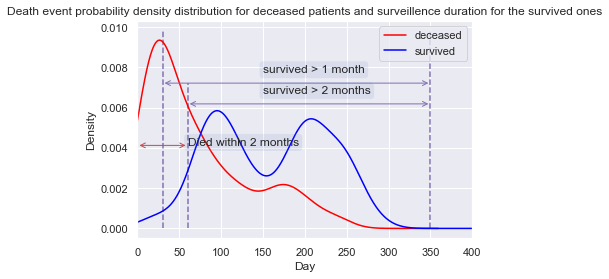

In [699]:
fig, ax = plt.subplots()
KERNEL_WIDTH = 0.3
df[df['DEATH_EVENT'] == 1]['time'].plot.kde(bw_method=KERNEL_WIDTH, ax=ax, color='red', label='deceased')
df[df['DEATH_EVENT'] == 0]['time'].plot.kde(bw_method=KERNEL_WIDTH, ax=ax, color='blue', label='survived')
ax.set_title('Death event probability density distribution for deceased patients and surveillence duration for the survived ones')
ax.set_xlabel('Day')
ax.legend(loc='best')
ax.set_xlim(0, 400)
ax.vlines(x=[30, 350], ymin=0, ymax=ax.get_ylim()[1], color='m', linestyles='dashed')
ax.annotate(text='survived > 1 month', xy=(30, 0.75*ax.get_ylim()[1]),
            xytext=(150, 0.75*ax.get_ylim()[1]),
            bbox=dict(boxstyle="round", alpha=0.1))
ax.annotate(text='', xy=(30, 0.7*ax.get_ylim()[1]),
            xytext=(350, 0.7*ax.get_ylim()[1]),
            arrowprops=dict(arrowstyle='<->', color='m'))

ax.vlines(x=60, ymin=0, ymax=0.70*ax.get_ylim()[1], color='m', linestyles='dashed')
ax.annotate(text='survived > 2 months', xy=(60, 0.65*ax.get_ylim()[1]),
            xytext=(150, 0.65*ax.get_ylim()[1]),
            bbox=dict(boxstyle="round", alpha=0.1))
ax.annotate(text='', xy=(60, 0.6*ax.get_ylim()[1]),
            xytext=(350, 0.6*ax.get_ylim()[1]),
            arrowprops=dict(arrowstyle='<->', color='m'))

ax.annotate(text='Died within 2 months', xy=(0, 0.4*ax.get_ylim()[1]),
            xytext=(60, 0.4*ax.get_ylim()[1]),
            bbox=dict(boxstyle="round", alpha=0.1))
ax.annotate(text='', xy=(0, 0.4*ax.get_ylim()[1]),
            xytext=(60, 0.4*ax.get_ylim()[1]),
            arrowprops=dict(arrowstyle='<->', color='r'))

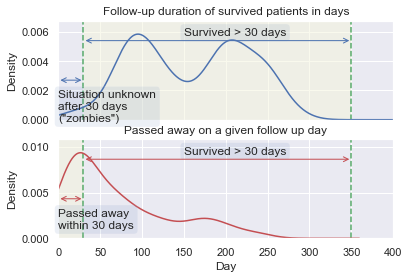

In [700]:
def plot_time(n_days=30):
    fig, axes = plt.subplots(2, 1, sharex=True)
    KERNEL_WIDTH = 0.3
    #df[df['DEATH_EVENT'] == 1]['time'].plot.kde(bw_method=KERNEL_WIDTH, ax=ax, color='red', label='deceased')
    N_DAYS = n_days

    from collections import namedtuple
    config = namedtuple('config', ['text1', 'text2', 'title', 'colour', 'hlight'])
    survived_config = config(f'Situation unknown\nafter {N_DAYS} days\n("zombies")',
                             f'Survived > {N_DAYS} days',
                             'Follow-up duration of survived patients in days',
                             'b', (N_DAYS, 350))
    dead_config = config(f'Passed away\nwithin {N_DAYS} days',
                         f'Survived > {N_DAYS} days',
                         'Passed away on a given follow up day',
                         'r', (0, N_DAYS))
    configs = (survived_config, dead_config)
    for i, ax in enumerate(axes):
        df[df['DEATH_EVENT'] == i]['time'].plot.kde(bw_method=KERNEL_WIDTH, ax=ax, color=configs[i].colour)
        ax.set_ylim(0, ax.get_ylim()[1]*1.1)
        ax.set_title(configs[i].title)
        ax.set_xlabel('Day')
        #ax.legend(loc='best')
        ax.set_xlim(0, 400)
        ax.vlines(x=[0, N_DAYS, 350], ymin=0, ymax=ax.get_ylim()[1], color='g', linestyles='dashed')

        ax.annotate(text=configs[i].text2, xy=(N_DAYS, 0.85*ax.get_ylim()[1]),
                    xytext=(150, 0.85*ax.get_ylim()[1]),
                    bbox=dict(boxstyle="round", alpha=0.1))
        ax.annotate(text='', xy=(N_DAYS, 0.8*ax.get_ylim()[1]),
                    xytext=(350, 0.8*ax.get_ylim()[1]),
                    arrowprops=dict(arrowstyle='<->', color=configs[i].colour))

        ax.annotate(text=configs[i].text1, xy=(0, 0.3*ax.get_ylim()[1]),
                    xytext=(0, 0.3*ax.get_ylim()[1]), ha='left', va='top',
                    bbox=dict(boxstyle="round", alpha=0.1))
        ax.annotate(text='', xy=(0, 0.4*ax.get_ylim()[1]),
                    xytext=(N_DAYS, 0.4*ax.get_ylim()[1]),
                    arrowprops=dict(arrowstyle='<->', color=configs[i].colour))
        ax.axvspan(*configs[i].hlight, facecolor='beige', alpha=0.5)
plot_time()

Interestingly, the 'time' feature has different meaning for either category of patients:
- for **survived** patients: duration of the follow-up time
- for **deceased** patients: day of their passing
Therefore, the former ones might have passed away anytime after the follow-up termination.
Hence, they have not necessarily survived for, for example the full 350-day period.

Selecting the 'survivors' of follow-up duration greater than $m$ days (`time`$>m$ days) means they have *certainly* survived the first $m$ days.
On the other hand, to be consistent, we must choose the 'non-survivors' who have passed away *within* the first $m$ days (`time`$ < m$ days). The corresponding regions are highlighted in the graphs.

This way we will be able to analyse how likely a given patient is to survive $m$ days, say 2 months, after the heart failure.

The patients whose follow-up duration is smaller than $m$ need to be rejected, reducing our statistics.

Let us see how many patients are we left with for various values of $m$.

Max sum arg: 70
Max F1 arg: 100


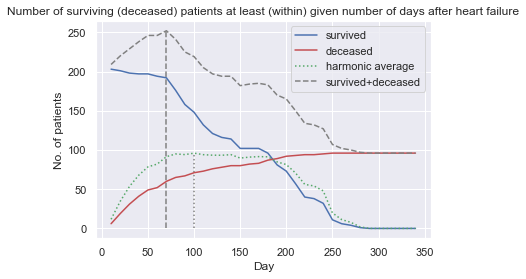

In [701]:
def plot_survived_died_period(n_min=10, n_max=350, step=10):
    days = []
    survived_arr = []
    deceased_arr = []
    f1 = []
    sum_all = []
    for n in range(n_min, n_max, step):
        days.append(n)
        survived = ((df['DEATH_EVENT'] == 0) & (df['time'] > n)).sum()
        survived_fr = survived / (df['DEATH_EVENT'] == 0).sum()
        died = ((df['DEATH_EVENT'] == 1) & (df['time'] < n)).sum()
        died_fr = died / (df['DEATH_EVENT'] == 1).sum()
        survived_arr.append(survived)
        deceased_arr.append(died)
        f1.append(2 * (survived * died) / (survived + died))
        sum_all.append(survived + died)
    max_sum_arg = np.argmax(sum_all)
    max_f1_arg = np.argmax(f1)
    print("Max sum arg:", days[max_sum_arg])
    print("Max F1 arg:", days[max_f1_arg])
    plt.plot(days, survived_arr, label='survived', color='b')
    plt.plot(days, deceased_arr, label='deceased', color='r')
    plt.plot(days, f1, label='harmonic average', color='g', linestyle='dotted')
    plt.plot(days, sum_all, label='survived+deceased', color='gray', linestyle='dashed')
    plt.vlines(x=days[max_sum_arg], ymin=0, ymax=sum_all[max_sum_arg], linestyles='dashed', colors='gray')
    plt.vlines(x=days[max_f1_arg], ymin=0, ymax=f1[max_f1_arg], linestyles='dotted', colors='gray')
    plt.xlabel("Day")
    plt.ylabel("No. of patients")
    plt.title("Number of surviving (deceased) patients at least (within) given number of days after heart failure")
    plt.legend(loc='best')
    plt.show()
plot_survived_died_period()

The harmonic average has an approximately plateau in the region around 75-175 days.
We might try to run the ML algorithms in that range.

The maximum harmonic average in on the 100-th day and the maximum sum of survived and deceased patients is if we split at the 70-th day. If we want to have both, high statistics and good balance between the categories, we should consider splitting around the 75-100 days. Of course, all other values all technically possible, but they should yield less precise ML performance (which claim we might test).

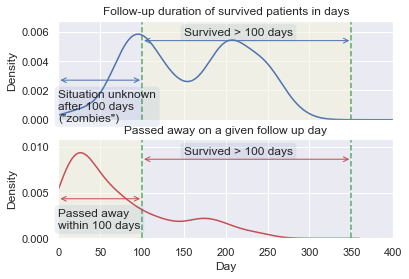

In [702]:
plot_time(100)

# Train set and test set
It is time to split the dataset into train and test sets.
Due to rather small statistics, we need to use stratified sampling to ensure the subgroups (i.e. surviving and deceased patients, and train/test patients) are representative of the population (i.e. the full dataset).

In [703]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)

In [704]:
# Select the patients
def select_df(n=100):
    select = (((df['DEATH_EVENT'] == 0) & (df['time'] > n)) | ((df['DEATH_EVENT'] == 1) & (df['time'] < n)))
    return df[select]
df = select_df()

# Remove not useful features
df = df.drop(["time"], axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [705]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [706]:
train_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
223,47.0,0,582,0,25,0,130000.00,0.8,134,1,0,0
179,55.0,0,835,0,40,0,279000.00,0.7,140,1,1,0
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
133,63.0,0,193,0,60,1,295000.00,1.3,145,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
170,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,0
15,82.0,1,379,0,50,0,47000.00,1.3,136,1,0,1
152,50.0,0,115,0,45,1,184000.00,0.9,134,1,1,0
257,58.0,0,132,1,38,1,253000.00,1.0,139,1,0,0


In [709]:
X_train = train_set.drop(["DEATH_EVENT"], axis=1) # drop labels and time for training set
y_train = train_set["DEATH_EVENT"].copy()
X_test = test_set.drop(["DEATH_EVENT"], axis=1) # drop labels and time for test set
y_test = test_set["DEATH_EVENT"].copy()

In [710]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
223,47.0,0,582,0,25,0,130000.00,0.8,134,1,0
179,55.0,0,835,0,40,0,279000.00,0.7,140,1,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
133,63.0,0,193,0,60,1,295000.00,1.3,145,1,1
...,...,...,...,...,...,...,...,...,...,...,...
170,51.0,1,582,1,35,0,263358.03,1.5,136,1,1
15,82.0,1,379,0,50,0,47000.00,1.3,136,1,0
152,50.0,0,115,0,45,1,184000.00,0.9,134,1,1
257,58.0,0,132,1,38,1,253000.00,1.0,139,1,0


In [711]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [712]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class TimeBinning(BaseEstimator, TransformerMixin):
#     """Convert time from days to months (or other units)."""
#     def __init__(self, bin_size=30, col_ind=-1):
#         self.bin_size = bin_size
#         self.col_ind = col_ind
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         X_cp = X.copy()
#         if isinstance(X_cp, pd.core.frame.DataFrame):
#             X_cp = X_cp.to_numpy()
#         X_cp[:, self.col_ind] = X_cp[:, self.col_ind] * self.bin_size \
#             + 0.5 * self.bin_size # put at the bin centre
#         return X_cp
#     def inverse_transform(self, X):
#         """Naturally, it loses resolution."""
#         X_re = X.copy()
#         X_re[:, self.col_ind] = X_re[:, self.col_ind] * self.bin_size \
#             + 0.5 * self.bin_size # put at the bin centre
#         return X_re

In [713]:
type(X_train)

pandas.core.frame.DataFrame

In [714]:
pipeline = Pipeline([
        #('time_bin', TimeBinning(bin_size=30)),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = pipeline.fit_transform(X_train)

In [715]:
X_train_tr

array([[-1.13454396, -0.83743579, -0.05671184, ..., -0.62481182,
         0.72336423, -0.6990253 ],
       [-0.46342344, -0.83743579,  0.16941911, ...,  0.75082429,
         0.72336423,  1.4305634 ],
       [ 0.20769707,  1.1941214 ,  1.00243904, ...,  0.06300623,
         0.72336423, -0.6990253 ],
       ...,
       [-0.88287377, -0.83743579, -0.4741156 , ..., -0.62481182,
         0.72336423,  1.4305634 ],
       [-0.21175325, -0.83743579, -0.45892103, ...,  0.5215516 ,
         0.72336423, -0.6990253 ],
       [ 0.20769707,  1.1941214 , -0.05671184, ...,  0.06300623,
         0.72336423,  1.4305634 ]])

In [716]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', C=1.0, random_state=0,
                             n_jobs=-1)
log_reg.fit(X_train_tr, y_train)

LogisticRegression(n_jobs=-1, random_state=0)

In [717]:
some_data = X_train_tr[:5].copy()
log_reg.predict(some_data)

array([0, 0, 0, 0, 0], dtype=int64)

In [718]:
X_train_tr

array([[-1.13454396, -0.83743579, -0.05671184, ..., -0.62481182,
         0.72336423, -0.6990253 ],
       [-0.46342344, -0.83743579,  0.16941911, ...,  0.75082429,
         0.72336423,  1.4305634 ],
       [ 0.20769707,  1.1941214 ,  1.00243904, ...,  0.06300623,
         0.72336423, -0.6990253 ],
       ...,
       [-0.88287377, -0.83743579, -0.4741156 , ..., -0.62481182,
         0.72336423,  1.4305634 ],
       [-0.21175325, -0.83743579, -0.45892103, ...,  0.5215516 ,
         0.72336423, -0.6990253 ],
       [ 0.20769707,  1.1941214 , -0.05671184, ...,  0.06300623,
         0.72336423,  1.4305634 ]])

In [719]:
#pd.DataFrame(pipeline.inverse_transform(some_data), columns=df.columns[:-1])

In [720]:
y_train[:5]

223    0
179    0
200    0
2      1
133    0
Name: DEATH_EVENT, dtype: int64

In [721]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [722]:
scores = cross_val_score(log_reg, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.7037037  0.65384615 0.65384615 0.69230769 0.69230769]
Mean score: 0.6792022792022792
Std dev: 0.021117242689693925


In [723]:
scores

array([0.7037037 , 0.65384615, 0.65384615, 0.69230769, 0.69230769])

In [724]:
scores.std()

0.021117242689693925

In [725]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_tr, y_train)

RandomForestClassifier(random_state=42)

In [726]:
scores = cross_val_score(forest_clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.85185185 0.61538462 0.76923077 0.73076923 0.76923077]
Mean score: 0.7472934472934474
Std dev: 0.07689985932191823


In [727]:
len(df.columns)-2

10

In [728]:
pipeline = Pipeline([
        #('time_bin', TimeBinning(bin_size=30)),
        ('std_scaler', StandardScaler()),
        ('clf', RandomForestClassifier(max_features=10, random_state=42))
    ])

In [729]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {#'time_bin__bin_size': [1, 2, 3, 4, 5], 
         'clf__n_estimators': [2, 10, 20, 21, 22, 30, 50], 
         'clf__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(pipeline, param_grid, cv=3,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(max_features=10,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'clf__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11],
                          'clf__n_estimators': [2, 10, 20, 21, 22, 30, 50]}],
             return_train_score=True, scoring='accuracy')

In [730]:
grid_search.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_features=9, n_estimators=2,
                                        random_state=42))])

In [731]:
grid_search.best_params_

{'clf__max_features': 9, 'clf__n_estimators': 2}

In [732]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_features,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010305,4.701341e-04,0.003325,4.698531e-04,1,2,"{'clf__max_features': 1, 'clf__n_estimators': 2}",0.659091,0.590909,0.651163,0.633721,0.030445,77,0.873563,0.896552,0.886364,0.885493,0.009405
1,0.023271,4.701903e-04,0.003989,0.000000e+00,1,10,"{'clf__max_features': 1, 'clf__n_estimators': 10}",0.750000,0.681818,0.697674,0.709831,0.029132,62,0.965517,0.988506,1.000000,0.984674,0.014336
2,0.042554,9.392012e-04,0.006316,4.709782e-04,1,20,"{'clf__max_features': 1, 'clf__n_estimators': 20}",0.795455,0.704545,0.744186,0.748062,0.037215,27,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.045545,1.243391e-03,0.005984,9.733398e-07,1,21,"{'clf__max_features': 1, 'clf__n_estimators': 21}",0.795455,0.727273,0.744186,0.755638,0.028989,16,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.047539,2.350670e-03,0.005319,4.699655e-04,1,22,"{'clf__max_features': 1, 'clf__n_estimators': 22}",0.795455,0.659091,0.744186,0.732911,0.056238,40,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.042552,1.695061e-03,0.005652,4.701340e-04,11,20,"{'clf__max_features': 11, 'clf__n_estimators':...",0.772727,0.681818,0.720930,0.725159,0.037234,52,0.988506,1.000000,1.000000,0.996169,0.005418
73,0.044215,1.880873e-03,0.006486,1.473393e-03,11,21,"{'clf__max_features': 11, 'clf__n_estimators':...",0.750000,0.704545,0.720930,0.725159,0.018796,52,0.988506,1.000000,1.000000,0.996169,0.005418
74,0.045054,4.701903e-04,0.004322,1.243943e-03,11,22,"{'clf__max_features': 11, 'clf__n_estimators':...",0.795455,0.704545,0.720930,0.740310,0.039563,35,0.988506,1.000000,1.000000,0.996169,0.005418
75,0.058352,2.247832e-07,0.006649,4.700217e-04,11,30,"{'clf__max_features': 11, 'clf__n_estimators':...",0.772727,0.681818,0.744186,0.732911,0.037960,40,1.000000,1.000000,1.000000,1.000000,0.000000


In [733]:
pd.DataFrame(grid_search.cv_results_)['mean_test_score'].mean()

0.7329677017837695

In [734]:
pd.DataFrame(grid_search.cv_results_)['mean_test_score'].std()

0.027701775560083203

In [735]:
feature_importances = grid_search.best_estimator_._final_estimator.feature_importances_

In [736]:
sorted(zip(feature_importances, [col for col in df.columns if col != 'DEATH_EVENT']), reverse=True)

[(0.2826975965979045, 'serum_creatinine'),
 (0.20952664367732127, 'ejection_fraction'),
 (0.18106791751246842, 'age'),
 (0.11129680134980739, 'creatinine_phosphokinase'),
 (0.08597054105468234, 'serum_sodium'),
 (0.050857913289344595, 'platelets'),
 (0.029690747317963128, 'smoking'),
 (0.020102301790281343, 'sex'),
 (0.017382362209948415, 'high_blood_pressure'),
 (0.011407175200278646, 'diabetes'),
 (0.0, 'anaemia')]

In [737]:
features_ranking = sorted(zip([col for col in df.columns if col != 'DEATH_EVENT'], feature_importances), 
                          reverse=True, key=lambda x: x[1])

In [738]:
features = [x[0] for x in features_ranking]
ranks = [x[1] for x in features_ranking]

Text(0.5, 0, 'Score')

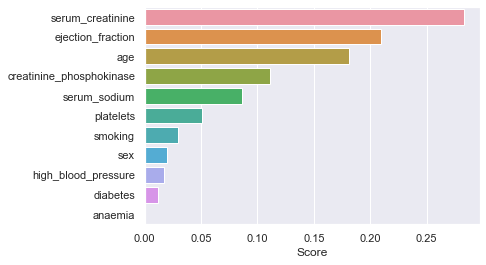

In [739]:
sns.barplot(y=features, x=ranks, orient='h')
plt.xlabel('Score')

In [744]:
best_features = features[:grid_search.best_params_['clf__max_features']]

In [745]:
clf = grid_search.best_estimator_

In [748]:
from sklearn.model_selection import cross_val_predict

In [752]:
X_train_tr.shape

(131, 11)

In [753]:
y_train.shape

(131,)

In [766]:
y_probas = cross_val_predict(clf, X_train_tr, y=y_train, cv=2,
                             method='predict_proba')

In [767]:
y_scores = y_probas[:, 1]

In [768]:
y_scores

array([0.5, 0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0.5,
       0. , 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0. , 0.5, 0.5, 0. , 0. ,
       0.5, 1. , 0.5, 0. , 0.5, 1. , 1. , 0.5, 0.5, 0. , 0. , 0.5, 0. ,
       0.5, 1. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0. ,
       1. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. ,
       0. , 0.5, 1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. ,
       0.5, 0. , 1. , 0.5, 1. , 1. , 0.5, 0. , 0.5, 0.5, 1. , 1. , 0.5,
       0.5, 0. , 0.5, 0. , 0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 0.5,
       0.5, 0. , 0.5, 0. , 0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0. , 0. ,
       0. , 0. , 0.5, 0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5,
       0. ])

In [774]:
#(clf.predict(X_test) == y_test).sum() / y_test.shape[0]

In [746]:
# clf.predict_proba(X_train_tr[:5])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Try other models

In [740]:
# Will we get the same x-validation performance using only the best two features?

In [ ]:
X_train_tr_best_features = pd.DataFrame(X_train_tr, columns=df.columns[:-1])[['time', 'serum_creatinine']]

In [ ]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

clf.fit(X_train_tr_best_features, y_train)

In [ ]:
scores = cross_val_score(clf, X_train_tr_best_features, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

In [ ]:
# strangely nope!
# Let's try using the full set

In [ ]:
scores = cross_val_score(clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

In [ ]:
# Again, after retraining it
clf.fit(X_train_tr, y_train)
scores = cross_val_score(clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

In [ ]:
# Let's use regression to get probabilities


TODO:
- [ ] ML
    - [X] Further optimise the Random Forest
    - [ ] Use regression or otherwise get probabilities
    - [ ] Plot F1, recall, precision, confusion matrix
    - [ ] Test set performance
    - [ ] Plot decision regions to understand how/why it works
    - [ ] Implement other algorithms: KNN, SVM
    - [ ] Use PCA: does it detect the same features? Is it useful in such a simple project?
    - [ ] Does MLP make sense in this project?
    - [ ] Is train/test split optimal? Is it really stratified?
    - [ ] Performance for different number of days $m$
- [ ] Deployment
    - [X] Save the model on disk
    - [X] Deploy light-weight (perhaps not optimised) algorithm using Flask
    - [ ] Test on PythonAnywhere
    - [ ] Polish Flask interface: nice forms?
- [ ] Communication
    - [ ] GitHub repo (notebook + pycharm things)
    - [ ] Blog post
    - [ ] Youtube video

In [ ]:
clf_best = grid_search.best_estimator_

In [ ]:
# Save the best estimator
# First retrain it on a smaller array so the unimportant features are not required in application
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train_tr_best_features, y_train)

In [1]:
best_features

NameError: name 'best_features' is not defined

In [ ]:
import joblib
joblib.dump(clf, "cardio_model.pkl")
# Train the pipeline to require exactly 2 features
X_train_best_features = pd.DataFrame(X_train, columns=df.columns[:-1])[['time', 'serum_creatinine']]
pipeline.fit(X_train_best_features)
joblib.dump(pipeline, 'pipeline.pkl')

In [ ]:
# Test the model on hypothetical new cases
model = joblib.load("cardio_model.pkl")

In [ ]:
X_train_tr_best_features[:3]

In [ ]:
y_train[:3]

In [ ]:
model.predict(X_train_tr_best_features[:3])

In [ ]:
X_train_tr_best_features[:3].shape

We need to feed the model some $n\times 2$ matrix.

# Evalute model performance on the test set

In [ ]:
# TODO: Before I do it, I should implement F1 score, precision/recall, ROC curves and so on in the training.
# Otherwise I might be biased and select a model better performing on the test sample, overtraining it.

# For now, let's just trust "this model is OK" and focus on deployment.

In [ ]:
X_train_tr.shape

In [ ]:
X_train_tr_best_features.shape

In [ ]:
type(X_train_tr_best_features)

In [ ]:
model.predict(np.array([[250, ]]))